# 实验一：KNN手写数字识别
- 姓名：姜志凯
- 学号：2011937
- 专业：信息安全

### 实验要求
- 题目：基于KNN 的手写数字识别
- 实验条件：给定semeion手写数字数据集，给定kNN分类算法
- 实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

C:\Users\PC\AppData\Local\Temp/ipykernel_1372/1310231474.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度，要求使用留一法

In [4]:
# KNN算法手动实现
def MyKnnClassifier(data_X, data_y, neighbors):
    sum=0
    # 生成数据集和测试集
    for p in range(data_X.shape[0]):
        X_test=data_X[p]
        y_test=data_y[p]
        X_train =[]
        y_train =[]
        for i in range(data_X.shape[0]):
            if i==p:
                continue
            else:
                X_train.append(data_X[i])
                y_train.append(data_y[i])
        X_train=np.array(X_train)
        y_train=np.array(y_train)
        X_test=np.array(X_test)
        y_test=np.array(y_test)
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = X_test.shape[0]     # 获得测试集的大小
        testRes = []  # 存放测试结果
        acc = 0   # 计算准确率
        # 针对测试集中每一个样本进行预测
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test,(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        testRes.append(classifyRes)
        if classifyRes == y_test[0]:  # 分类正确则将accRate+1
            sum+= 1
    acc=sum/data_X.shape[0]
    print('k={0}时, 正确个数为：{1}  准确率为：{2}'.format(neighbors,sum,acc))
    return acc

实验结果：

In [5]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时, 正确个数为：1459  准确率为：0.9158819836785939
k=3时, 正确个数为：1464  准确率为：0.9190207156308852
k=5时, 正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

In [6]:
# kNN算法weka库实现
'''
def KnnClassifier(data_X, data_y, neighbors, flag=0):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train.ravel())
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(neighbors,knn.score(X_test, y_test)))
    # 交叉验证
    if flag == 1:
        scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
        return scores.mean()
'''
# 将数据整理成.csv文件，并删除十列的标签列，在最后增加一列新的标签列，为汉字版的标签（如“零”、“一”等）。（如果是阿拉伯数字
# weka会自动当成回归问题去解决，改成汉字，就按照分类的问题去解决）
# 然后将.csv数据文件上传到weka应用程序中，选择分类，分类器选择lazy目录下的IBK（即KNN算法），点击选择的IBK分类器可以设置参数，即k的值。
# 点击start，即开始调用weka库来实现kNN算法的分类。

实验结果：

k=1时,weka机器学习包中的kNN分类结果


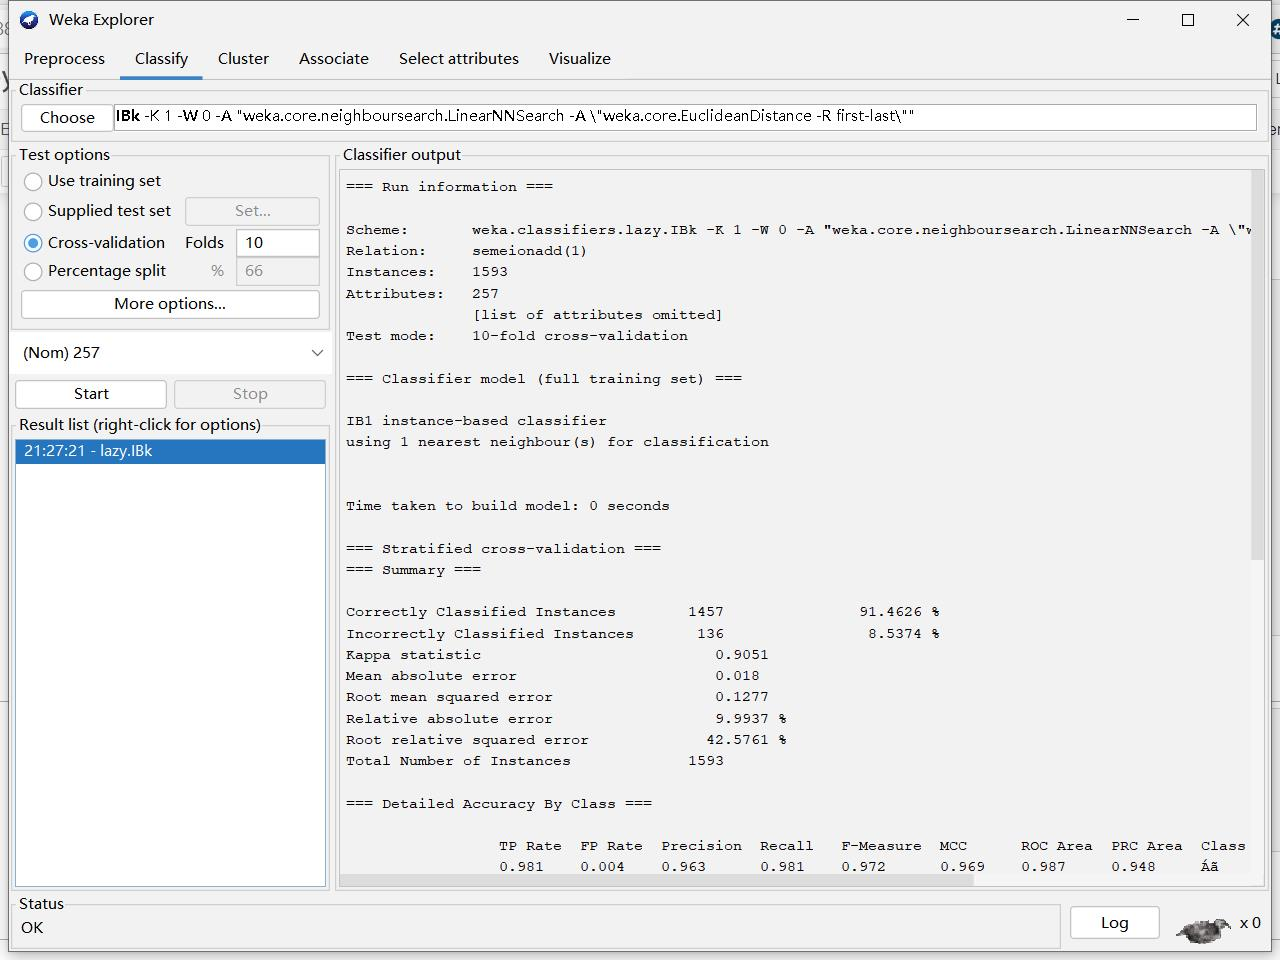

In [3]:
'''
KnnClassifier(X, y, 1)
KnnClassifier(X, y, 3)
KnnClassifier(X, y, 5)
'''
from IPython.display import Image
print("k=1时,weka机器学习包中的kNN分类结果")
Image(filename="./k=1.jpg",width=800,height=800)

k=3时,weka机器学习包中的kNN分类结果


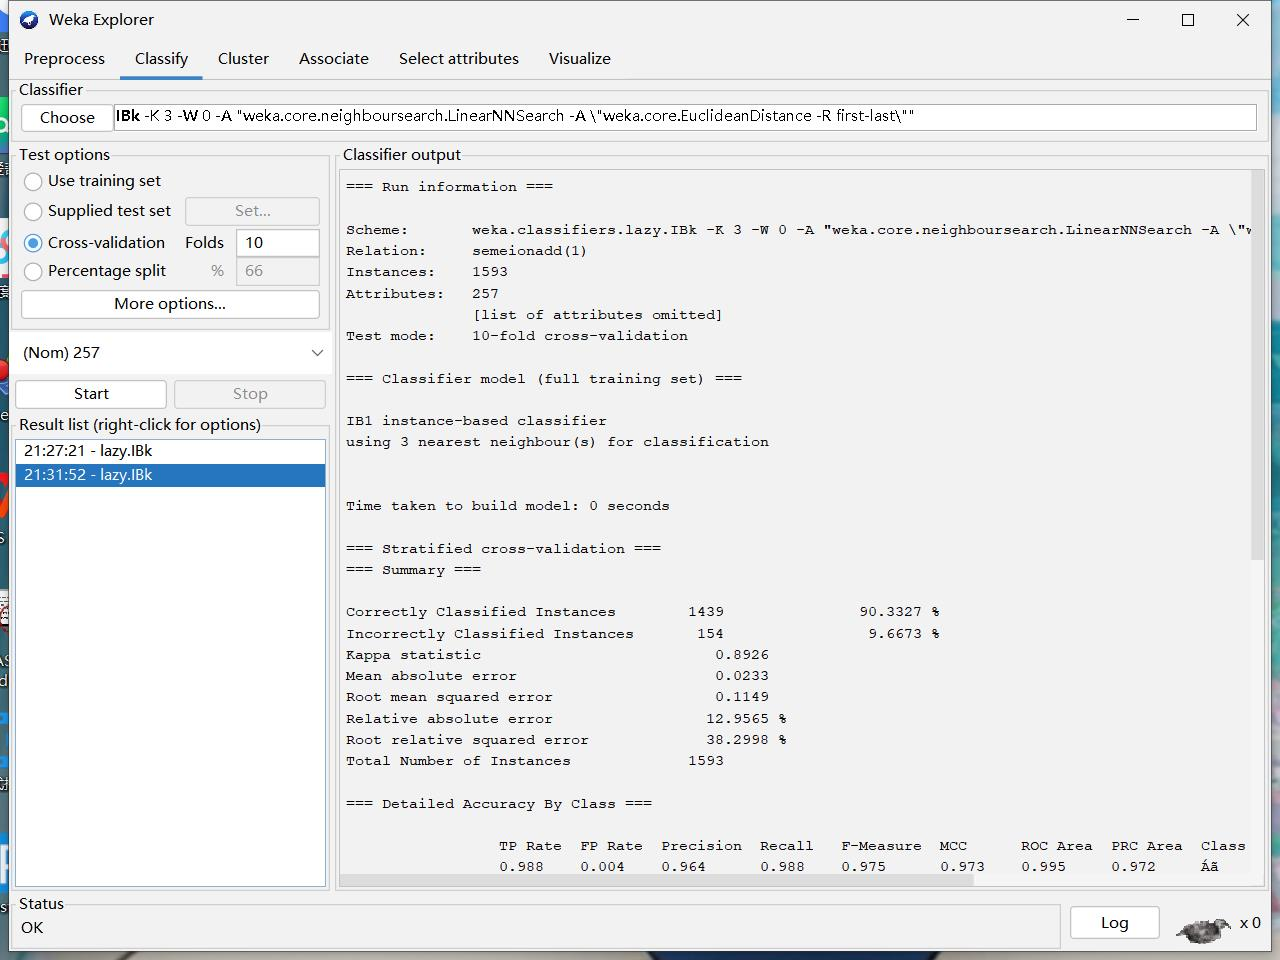

In [4]:
print("k=3时,weka机器学习包中的kNN分类结果")
Image(filename="./k=3.jpg",width=800,height=800)

k=5时,weka机器学习包中的kNN分类结果


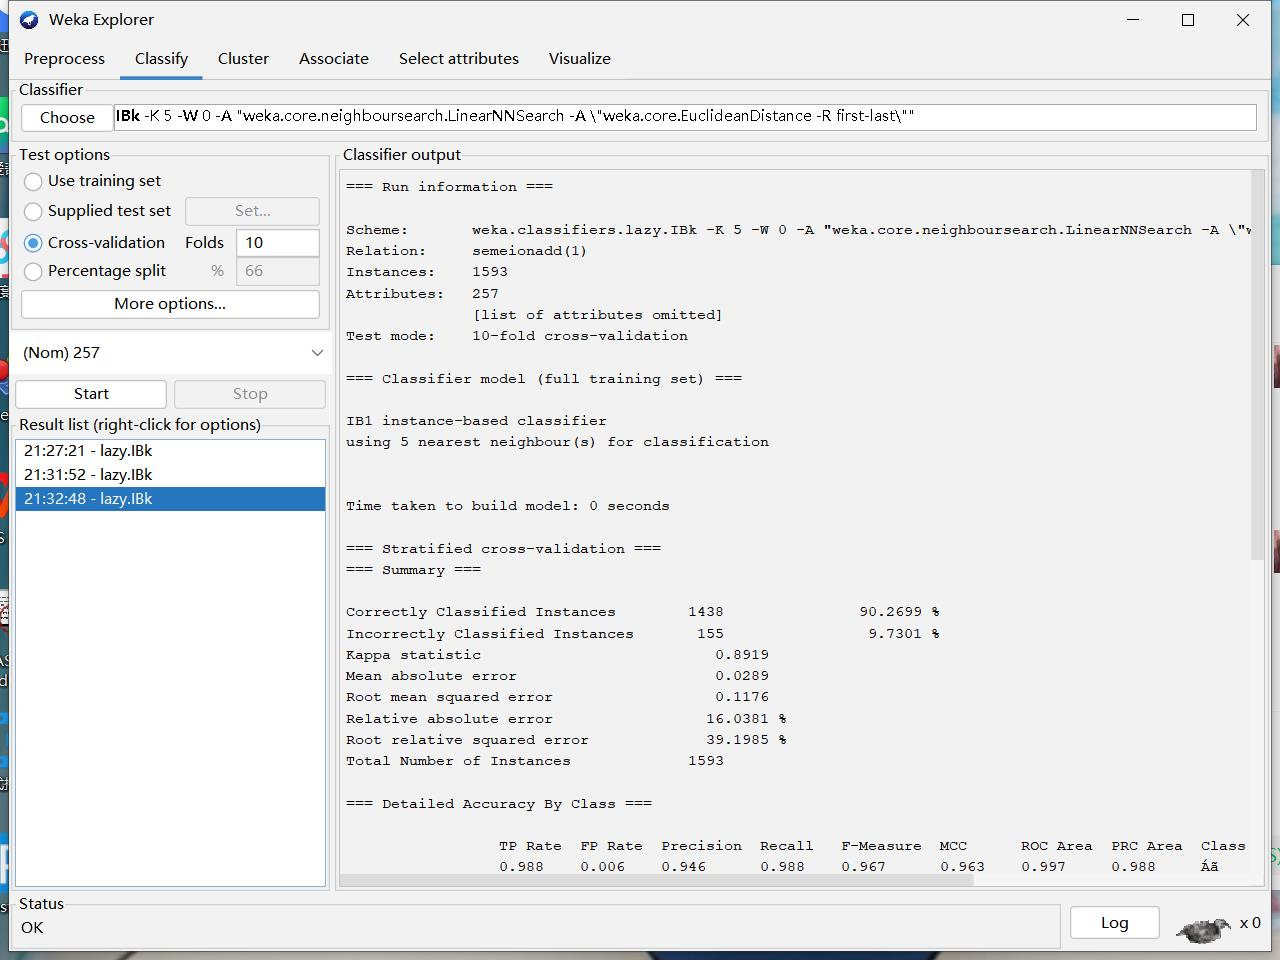

In [5]:
print("k=5时,weka机器学习包中的kNN分类结果")
Image(filename="./k=5.jpg",width=800,height=800)

### 高级要求
将实验过程结果等图示展出

In [12]:
scores1 = []
#scores2 = []

for k in range(1,30):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)
    
#for k in range(1,30):
#    score2 = KnnClassifier(X, y, k, 1)
#    scores2.append(score2)

k=1时, 正确个数为：1459  准确率为：0.9158819836785939
k=2时, 正确个数为：1459  准确率为：0.9158819836785939
k=3时, 正确个数为：1464  准确率为：0.9190207156308852
k=4时, 正确个数为：1465  准确率为：0.9196484620213434
k=5时, 正确个数为：1458  准确率为：0.9152542372881356
k=6时, 正确个数为：1464  准确率为：0.9190207156308852
k=7时, 正确个数为：1469  准确率为：0.9221594475831764
k=8时, 正确个数为：1472  准确率为：0.9240426867545511
k=9时, 正确个数为：1471  准确率为：0.9234149403640929
k=10时, 正确个数为：1465  准确率为：0.9196484620213434
k=11时, 正确个数为：1456  准确率为：0.9139987445072191
k=12时, 正确个数为：1460  准确率为：0.9165097300690521
k=13时, 正确个数为：1461  准确率为：0.9171374764595104
k=14时, 正确个数为：1453  准确率为：0.9121155053358443
k=15时, 正确个数为：1446  准确率为：0.9077212806026366
k=16时, 正确个数为：1446  准确率为：0.9077212806026366
k=17时, 正确个数为：1442  准确率为：0.9052102950408035
k=18时, 正确个数为：1438  准确率为：0.9026993094789705
k=19时, 正确个数为：1436  准确率为：0.901443816698054
k=20时, 正确个数为：1435  准确率为：0.9008160703075957
k=21时, 正确个数为：1436  准确率为：0.901443816698054
k=22时, 正确个数为：1440  准确率为：0.903954802259887
k=23时, 正确个数为：1435  准确率为：0.9008160703075957
k=24时, 正确个数为：1427  准确率为

对图表的一些文字说明...

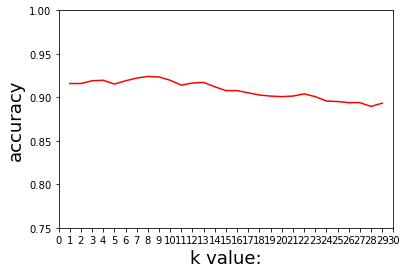

In [13]:
    plt.xlabel('k value:',fontsize=18)
    plt.ylabel('accuracy',fontsize=18)
    x_major_locator = plt.MultipleLocator(1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0, 30)
    plt.ylim(0.75, 1)
    # 普通kNN分类精度
    plt.plot(range(1,30),scores1,'r')
    # plt.plot(range(1,30),scores2,'b')
    plt.show()

对于weka机器学习包中的kNN算法的结果，在本机的程序上从1到30对k赋值得到正确率，然后用excel画出表格。
k	正确个数	准确率
1	1457	91.4626
2	1411	88.575
3	1439	90.3327
4	1436	90.1444
5	1438	90.2699
6	1438	90.2699
7	1439	90.3327
8	1429	89.705
9	1433	89.9561
10	1433	89.956
11	1443	90.5838
12	1433	89.9561
13	1427	89.5794
14	1422	89.2655
15	1423	89.3283
16	1423	89.3283
17	1424	89.3911
18	1426	89.5166
19	1424	89.3911
20	1426	89.5166
21	1417	88.9517
22	1414	88.7633
23	1412	88.6378
24	1411	88.575
25	1408	88.3867
26	1410	88.5122
27	1411	88.575
28	1410	88.5122
29	1410	88.5122
30	1408	88.3867

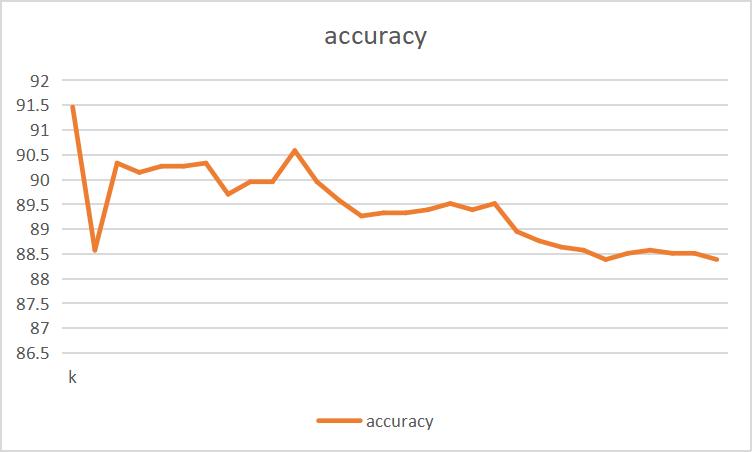

In [6]:
Image(filename="./weka图示.png",width=800,height=800)